In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
#import geoip2.database

In [2]:
! pwd

/Users/qinghongxu/Desktop/Computing/bcdata/pims-bcdata18-cloudpbx/jackiexu


In [3]:
DATA_ROOT = ''
CSV_FILE_PATH = os.path.join(DATA_ROOT + 'pims_cloudpbx_subset_201806051550_1million.csv')
GEOLITE_DB_PATH = os.path.join(DATA_ROOT,'GeoLite2-City.mmdb')

In [4]:
DESCRIBED_COLUMNS = ["calldate", "callend", "duration", "connect_duration", "progress_time", 
                    "first_rtp_time", "caller", "caller_domain", "caller_reverse", "callername", 
                     "callername_reverse", "called", "called_domain", "called_reverse", "sipcallerip", 
                     "sipcallerport", "sipcalledip", "sipcalledport", "whohanged", "lastSIPresponse_id", 
                     "dscp", "a_payload", "b_payload", "a_saddr", "b_saddr", "a_received", "b_received", 
                     "a_lost", "b_lost", "a_ua_id", "b_ua_id", "a_avgjitter_mult10", "b_avgjitter_mult10",
                     "a_maxjitter", "b_maxjitter", "a_sl1", "a_sl2", "a_sl3", "a_sl4", "a_sl5", "a_sl6", 
                     "a_sl7", "a_sl8", "a_sl9", "a_sl10", "a_d50", "a_d70", "a_d90", "a_d120", "a_d150", 
                     "a_d200", "a_d300", "b_sl1", "b_sl2", "b_sl3", "b_sl4", "b_sl5", "b_sl6", "b_sl7", 
                     "b_sl8", "b_sl9", "b_sl10", "b_d50", "b_d70", "b_d90", "b_d120", "b_d150", "b_d200", 
                     "b_d300", "a_mos_f1_mult10", "a_mos_f2_mult10", "a_mos_adapt_mult10", 
                   "b_mos_f1_mult10", "b_mos_f2_mult10", "b_mos_adapt_mult10", "a_rtcp_loss", 
                     "a_rtcp_maxfr", "a_rtcp_avgfr_mult10", "a_rtcp_maxjitter", "a_rtcp_avgjitter_mult10", 
                     "b_rtcp_loss", "b_rtcp_maxfr", "b_rtcp_avgfr_mult10", "b_rtcp_maxjitter", 
                     "b_rtcp_avgjitter_mult10", "packet_loss_perc_mult1000", "a_packet_loss_perc_mult1000", 
                     "b_packet_loss_perc_mult1000", "delay_sum", "a_delay_sum", "b_delay_sum", 
                     "a_rtp_ptime", "b_rtp_ptime"]

In [5]:
# read dataframe. calldate and callend are the only date columns
df = pd.read_csv(CSV_FILE_PATH,delim_whitespace=True)
#df = df[DESCRIBED_COLUMNS]
# remo`ve any columns that are entirely NA.
df.dropna(axis = 1, how = 'all', inplace=True)
# some columns have "sanitized" written the whole way down:
#    remove these.
df = df.loc[:, ~(df == 'sanitized').all(axis=0)]
# ## sighup was removed by the DESCRIBED_COLUMNS subsetting
# XX sighup column is entirely zeros. remove it. 
# XX df.drop(columns=['sighup'], inplace=True) 
# create a version of duration column of type timedelta
df.drop(columns=[col for col in df.columns if 'reverse' in col], inplace=True)
#df['duration_td'] = df.callend - df.calldate

# a dataframe where the rows have been removed if 
# there are more than 60% NA values in those rows.
df_dens = df.dropna(axis=0, thresh = 79)



/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.



#Problem 1: Count the number of call records with MOS <= 3, and plot them by time

In [6]:
df_mos_score = df['b_mos_adapt_mult10'] / 10  #dataframe
threshold_mos = 4
df_bad = df[df_mos_score < threshold_mos]

In [7]:
df_bad_ua_id = df_bad['b_ua_id']

In [8]:
calldate = df_bad['calldate']
MOS = df_bad['b_mos_f1_mult10']

Problem 2: the pattern of phone call's loss pocket "b_sl1", "b_sl2", "b_sl3", "b_sl4", "b_sl5", "b_sl6", "b_sl7", 
                     "b_sl8", "b_sl9", "b_sl10",

{'b_sl1': 274371, 'b_sl2': 61042, 'b_sl3': 21918, 'b_sl4': 7758, 'b_sl5': 3161, 'b_sl6': 1443, 'b_sl7': 706, 'b_sl8': 397, 'b_sl9': 257, 'b_sl10': 1444}


<BarContainer object of 10 artists>

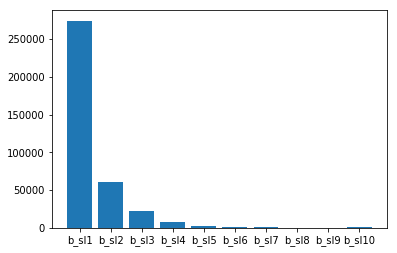

In [9]:
df_pl_b = df[['b_sl1','b_sl2','b_sl3','b_sl4','b_sl5','b_sl6','b_sl7','b_sl8','b_sl9','b_sl10']]
fields_b = ['b_sl1','b_sl2','b_sl3','b_sl4','b_sl5','b_sl6','b_sl7','b_sl8','b_sl9','b_sl10']
array_b = {}
for c_n_b in fields_b:
    df_p1_n_b = df_pl_b[c_n_b] > 0
    df_pl_n_b = df_pl_b[df_p1_n_b]
    #array_b = print(len(df_pl_n_b))
    array_b[c_n_b] = len(df_pl_n_b)

print(array_b)
names_b = list(array_b.keys())
values_b = list(array_b.values())
plt.bar(range(len(array_b)),values_b,tick_label=names_b)
#plt.show()

                     a_sl1  a_sl2  a_sl3  a_sl4  a_sl5  a_sl6  a_sl7  a_sl8  \
76491540 2018-05-03     15      1      2      0      0      0      0      0   
76563939 2018-05-04      7      3      2      0      0      0      0      0   
76736884 2018-05-07     33      4      3      0      0      0      0      0   
76819008 2018-05-07     16      5      1      1      0      0      0      0   
77738343 2018-05-16     14      0      4      2      0      0      0      0   
65882298 2018-01-19      0      0      0      0      0      0      0      0   
65882307 2018-01-19      0      0      0      0      0      0      0      0   
66031973 2018-01-22      0      0      0      0      0      0      0      0   
66032030 2018-01-22      0      0      0      0      0      0      0      0   
66951830 2018-02-01      2      0      0      0      0      0      0      0   
66951910 2018-02-01      2      0      0      0      0      0      0      0   
69687752 2018-02-28      0      0      0      0     

<BarContainer object of 10 artists>

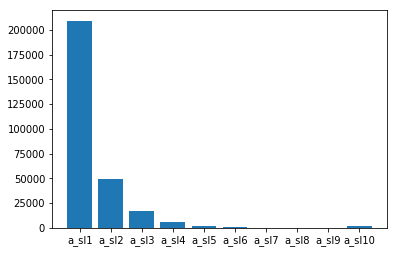

In [10]:
df_pl_a = df[['a_sl1','a_sl2','a_sl3','a_sl4','a_sl5','a_sl6','a_sl7','a_sl8','a_sl9','a_sl10']]
fields_a = ['a_sl1','a_sl2','a_sl3','a_sl4','a_sl5','a_sl6','a_sl7','a_sl8','a_sl9','a_sl10']
array_a = {}
for c_n_a in fields_a:
    df_p1_n_a = df_pl_a[c_n_a] > 0
    df_pl_n_a = df_pl_a[df_p1_n_a]
    #array_a = print(len(df_pl_n_a))
    array_a[c_n_a] = len(df_pl_n_a)

print(df_pl_n_a)
names_a = list(array_a.keys())
values_a = list(array_a.values())
#plt.bar(range(len(array_a)),values_a,tick_label=names_a)
#plt.show()

In [21]:
df_a_ua_id = df['a_ua_id']
df_b_ua_id = df['b_ua_id']
#df_a_ua_id.shape
df_a_ua_id
#df_b_ua_id
df_a_ua_id.drop_duplicates(inplace=True)
#df_b_ua_id.drop_duplicates(inplace=True)
#df_a_ua_id.dropna(inplace=True)
df_b_ua_id.dropna(inplace=True)
df_a_ua_id
#a_ua_id = drop_duplicates()

KeyError: 'a_ua_id'

In [12]:
#a_ua_id = set(df_a_ua_id.values)
b_ua_id = set(df_b_ua_id.values)
b_ua_id


{2.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 13.0,
 17.0,
 21.0,
 27.0,
 30.0,
 31.0,
 38.0,
 42.0,
 44.0,
 48.0,
 57.0,
 79.0,
 84.0,
 89.0,
 92.0,
 94.0,
 99.0,
 104.0,
 107.0,
 108.0,
 109.0,
 114.0,
 119.0,
 122.0,
 123.0,
 131.0,
 134.0,
 152.0,
 156.0,
 167.0,
 179.0,
 205.0,
 242.0,
 245.0,
 255.0,
 261.0,
 268.0,
 301.0,
 304.0,
 344.0,
 424.0,
 512.0,
 614.0,
 693.0,
 745.0,
 760.0,
 910.0,
 924.0,
 970.0,
 1573.0,
 1840.0,
 1950.0,
 1952.0,
 1953.0,
 1954.0,
 2154.0,
 2177.0,
 2256.0,
 2288.0,
 2354.0,
 2429.0,
 2430.0,
 2523.0,
 2570.0,
 2651.0,
 2661.0,
 2683.0,
 2810.0,
 2930.0,
 2936.0,
 2939.0,
 2942.0,
 2972.0,
 2986.0,
 3022.0,
 3024.0,
 3056.0,
 3064.0,
 3081.0,
 3108.0,
 3112.0,
 3117.0,
 3129.0,
 3132.0,
 3155.0,
 3156.0,
 3194.0,
 3209.0,
 3245.0,
 3279.0,
 3287.0,
 3312.0,
 3334.0,
 3339.0,
 3348.0,
 3351.0,
 3353.0,
 3354.0,
 3371.0,
 3388.0,
 3394.0,
 3396.0,
 3399.0,
 3406.0,
 3411.0,
 3425.0,
 3429.0,
 3431.0,
 3439.0,
 3444.0,
 3448.0,
 3457.0,
 3465.0,
 3467.0,
 34

In [13]:
union_ua_id = a_ua_id.union(b_ua_id)

In [14]:
FILEPATH='../data/pims_cloudpbx_cdrua_201806061020.csv'
df_ua_id = pd.read_csv(FILEPATH,sep='\t')

In [15]:
union_ua_id_int = [int(n) for n in list(union_ua_id)]

df_ua_id_all = pd.DataFrame(union_ua_id_int,columns=['id'])

df_ua_id_all_merge = df_ua_id_all.merge(df_ua_id, on='id', how='left')
df_ua_id_all_merge
df_ua_id_all_merge.groupby(['ua'])


In [16]:
df_bad_ua_id = df_bad_ua_id.dropna()
df_bad_ua_id_int = [int(n) for n in list(df_bad_ua_id)]
df_bad_ua_id_int
df_bad_ua_id_all = pd.DataFrame(df_bad_ua_id_int,columns=['id'])
#df_bad_ua_id_all

df_bad_ua_id_all_merge = df_bad_ua_id_all.merge(df_ua_id, on='id', how='left')
df_bad_ua_id_all_merge
df = df_bad_ua_id_all_merge.groupby('ua').count()
#df1 = df[df.ua] == '3CXPhoneSystem 15.5.10244.4 (9880)'
#df1
#df_bad_ua_id_all_merge.shape
#df_bad_ua_id_all_merge.shape
#set(df_ua_id_all_merge['ua'])

{'2600hz',
 '3CXPhoneSystem 15.5.10244.4 (9880)',
 '3CXPhoneSystem 15.5.3849.1 (3392)',
 '3CXPhoneSystem 15.5.6354.2 (6180)',
 '3CXPhoneSystem 15.5.8801.3 (8713)',
 '3CXPhoneSystem 15.5.9348.3 (8713)',
 'AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 00908F15AC42)',
 'AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 00908F223E35)',
 'AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 00908F2250D4)',
 'AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 00908F225196)',
 'AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 00908F22565D)',
 'Aastra 53i/2.5.2.1500',
 'Aastra 55i/3.2.2.1141',
 'Aastra 55i/3.2.2.2042',
 'Aastra 55i/3.2.2.2077',
 'Aastra 55i/3.2.2.3077',
 'Aastra 55i/3.3.1.2235',
 'Aastra 57i/3.2.2.2042',
 'Aastra 57i/3.2.2.3077',
 'Aastra 57iCT/2.6.0.1008',
 'Aastra 6730i/3.3.1.2235',
 'Aastra 6731i/3.2.2.2042',
 'Aastra 6731i/3.2.2.2077',
 'Aastra 6731i/3.3.1.4358',
 'Aastra 6869i/4.0.0.65',
 'Asterisk PBX',
 'Bria 4 4.1.1 74246-c6608049-W6.1',
 'Bria 4 release 4.1.1 stamp 74246',
 'Bria 4 release 4

In [17]:
df = df.sort_values(by=['id'], ascending=False)
df = df[df['id'] > 10]
#df = df.groupby('ua')
df.groupby('ua').first()

,id
ua,
AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 00908F223E35),19
AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 00908F22565D),29
Aastra 57i/3.2.2.2042,13
Aastra 6731i/3.2.2.2042,40
Bria 4 release 4.2.0 stamp 77495,21
Bria 4 release 4.2.1 stamp 78100,17
Bria 4 release 4.4.0 stamp 79956,108
Bria 4 release 4.8.1 stamp 84929,199
Bria iOS release 3.9.7 stamp 38887.38893,103


In [18]:
labels = 'VVX-VVX_400-UA/5.5.0.20556','VVX-VVX_300-UA/5.5.0.20556','VVX-VVX_300-UA/5.0.2.2756','others'
values = [1236,921,421,397,377]

colors = ['gold', 'yellowgreen', 'coral', 'lightskyblue','red']
explode = (0, 0, 0, 0,0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Polycom')
plt.axis('equal')
plt.show()

NameError: name 'sizes' is not defined

In [ ]:
labels = 'Python', 'C++', 'Ruby', 'Java','pyhon'
sizes = [215, 130, 245, 210,310]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightyellow']
explode = (0,0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
 
labels = ['Cookies', 'Jellybean', 'Milkshake', 'Cheesecake']
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()